# Image Sharpening in Spatial Domain
### Manual Implementation of Laplacian, LoG, Unsharp Masking, and High-Boost

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_convolve(image, kernel):
    """Performs manual 2D convolution with zero padding."""
    img_h, img_w = image.shape
    ker_h, ker_w = kernel.shape
    pad_h, pad_w = ker_h // 2, ker_w // 2
    
    # Create padded image
    padded_img = np.zeros((img_h + 2*pad_h, img_w + 2*pad_w))
    padded_img[pad_h:img_h+pad_h, pad_w:img_w+pad_w] = image
    
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i+ker_h, j:j+ker_w]
            output[i, j] = np.sum(region * kernel)
            
    return output

def normalize(img):
    """Clips and converts to uint8 for display."""
    return np.clip(img, 0, 255).astype(np.uint8)

# 1. Load Image
img = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    # Creating a dummy synthetic image if file doesn't exist
    img = np.zeros((200, 200), dtype=np.uint8)
    cv2.rectangle(img, (50, 50), (150, 150), 255, -1)

In [4]:
# --- B1. Laplacian Filter ---
lap_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_edges = manual_convolve(img, lap_kernel)
sharpened_lap = normalize(img.astype(np.float32) - laplacian_edges)

# --- B2. Laplacian of Gaussian (LoG) ---
log_kernel = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
])
log_edges = manual_convolve(img, log_kernel)
sharpened_log = normalize(img.astype(np.float32) + log_edges)

# --- B3. Unsharp Masking ---
blur_kernel = np.ones((5, 5)) / 25.0
blurred = manual_convolve(img, blur_kernel)
mask = img.astype(np.float32) - blurred
unsharp_img = normalize(img.astype(np.float32) + mask)

# --- B4. High-Boost Filtering (k > 1) ---
k = 1.5
high_boost = normalize(img.astype(np.float32) + k * mask)

# --- B5. Gradient-Based (Sobel) ---
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
grad_x = manual_convolve(img, sobel_x)
grad_y = manual_convolve(img, sobel_y)
gradient_mag = np.sqrt(grad_x**2 + grad_y**2)
sharpened_sobel = normalize(img.astype(np.float32) + gradient_mag)


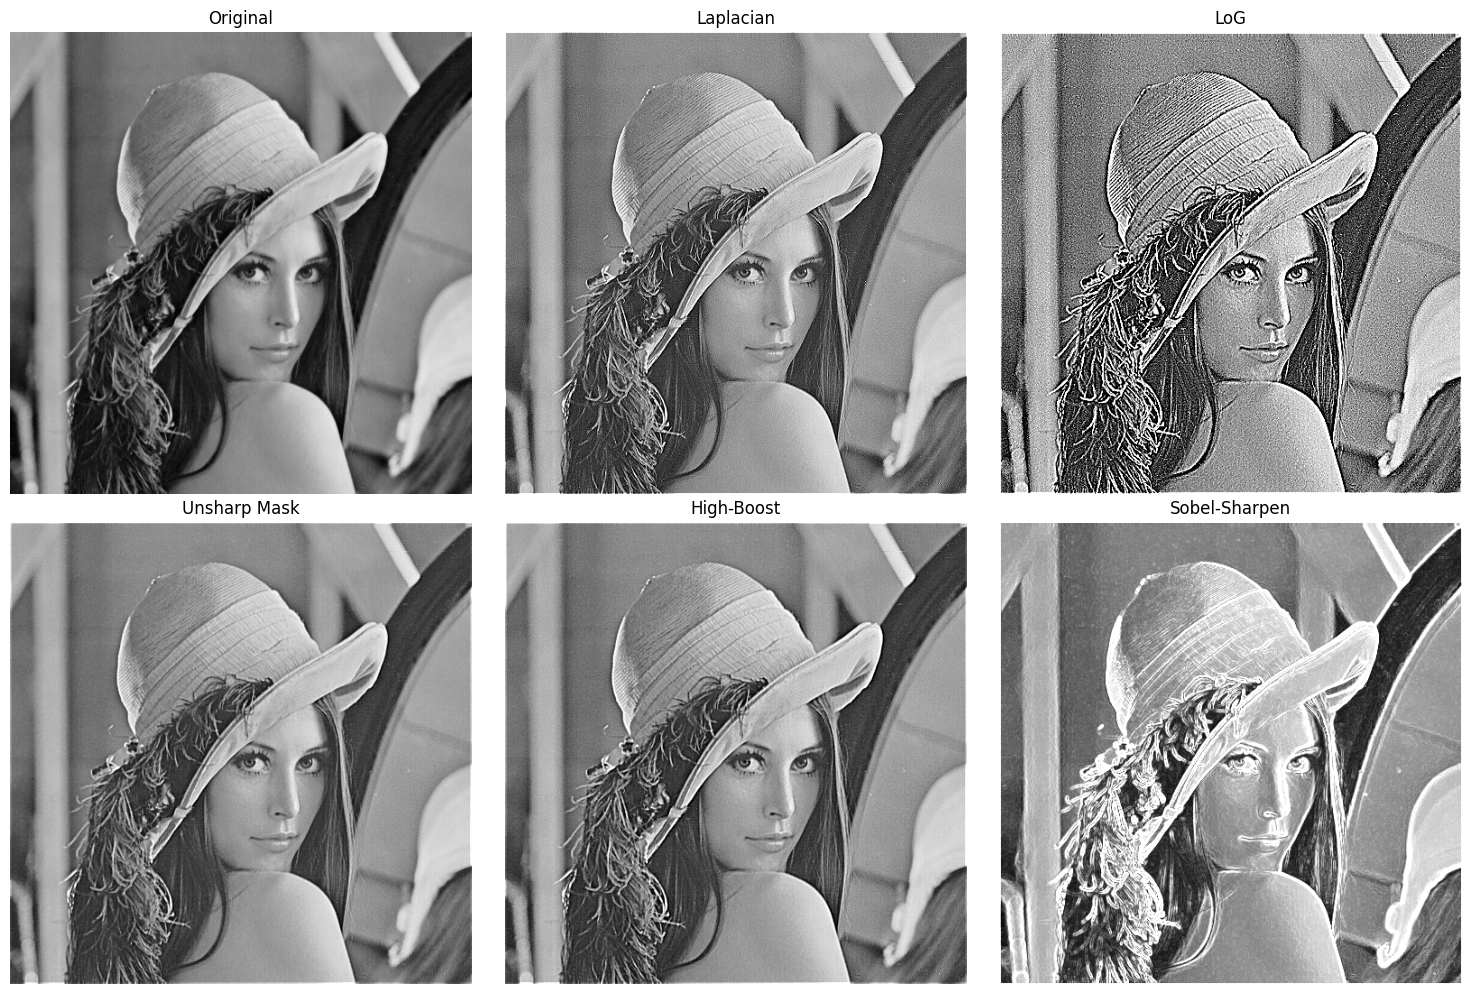

In [5]:

# Visualization
titles = ['Original', 'Laplacian', 'LoG', 'Unsharp Mask', 'High-Boost', 'Sobel-Sharpen']
images = [img, sharpened_lap, sharpened_log, unsharp_img, high_boost, sharpened_sobel]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()